In [1]:
# Import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Load in the data
X = pd.read_csv('representation_word2vec.csv').values
y = np.array(pd.read_csv('labels.csv')['label'])

In [3]:
y = y - 1
y

array([3, 2, 4, ..., 0, 3, 0])

In [4]:
X.shape

(50000, 200)

In [5]:
y.shape

(50000,)

In [6]:
# Create the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [7]:
# Define the layers
input_layer = tf.keras.layers.Input(shape=(200,))
hidden_one = tf.keras.layers.Dense(20, activation='relu') # The first hidden layer with 128 neurons
hidden_two = tf.keras.layers.Dense(20, activation='relu') # The first hidden layer with 128 neurons
hidden_three = tf.keras.layers.Dense(20, activation='relu') # The first hidden layer with 128 neurons
hidden_four = tf.keras.layers.Dense(20, activation='relu') # The first hidden layer with 128 neurons
hidden_five = tf.keras.layers.Dense(20, activation='relu') # The first hidden layer with 128 neurons
dropout = tf.keras.layers.Dropout(0.2) # Randomly sets 20% of the neurons to 0 during each forward pass
output_layer = tf.keras.layers.Dense(5, activation='softmax')

In [8]:
# Create the model
model = tf.keras.models.Sequential([input_layer, 
                                    hidden_one,
                                    hidden_two,
                                    hidden_three,
                                    hidden_four,
                                    hidden_five,
                                    dropout, 
                                    output_layer])

In [9]:
# Define how the model should be trained
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Train the model
result = model.fit(X_train, y_train,
                   validation_data=(X_test, y_test),
                   epochs=15)

Train on 37500 samples, validate on 12500 samples
Epoch 1/15
37500/37500 [==============================] - 3s 93us/sample - loss: 1.3978 - accuracy: 0.3754 - val_loss: 1.1662 - val_accuracy: 0.5014
Epoch 2/15
37500/37500 [==============================] - 2s 66us/sample - loss: 1.1389 - accuracy: 0.5047 - val_loss: 1.0631 - val_accuracy: 0.5454
Epoch 3/15
37500/37500 [==============================] - 2s 67us/sample - loss: 1.0879 - accuracy: 0.5261 - val_loss: 1.0379 - val_accuracy: 0.5565
Epoch 4/15
37500/37500 [==============================] - 2s 66us/sample - loss: 1.0648 - accuracy: 0.5412 - val_loss: 1.0256 - val_accuracy: 0.5623
Epoch 5/15
37500/37500 [==============================] - 3s 72us/sample - loss: 1.0466 - accuracy: 0.5495 - val_loss: 1.0161 - val_accuracy: 0.5677
Epoch 6/15
37500/37500 [==============================] - 3s 78us/sample - loss: 1.0401 - accuracy: 0.5533 - val_loss: 1.0121 - val_accuracy: 0.5694
Epoch 7/15
37500/37500 [==============================] 

In [11]:
# Print the results
print("Train score:", model.evaluate(x=X_train, y=y_train, verbose=0)[1]);
print("Test score:", model.evaluate(x=X_test, y=y_test, verbose=0)[1]);

Train score: 0.58464
Test score: 0.57032


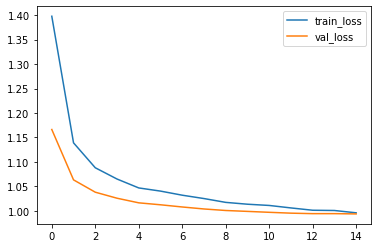

In [12]:
# Plot the cost function at each itteration
# Note: model.fit() returns an object that contains the history of the training process
plt.plot(result.history['loss'], label='train_loss');
plt.plot(result.history['val_loss'], label='val_loss');
plt.legend();

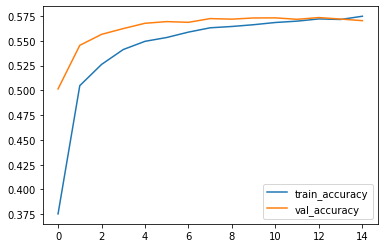

In [13]:
# Plot the cost function at each itteration
# Note: model.fit() returns an object that contains the history of the training process
plt.plot(result.history['accuracy'], label='train_accuracy');
plt.plot(result.history['val_accuracy'], label='val_accuracy');
plt.legend();